In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS
from statsmodels.api import add_constant

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [105]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [106]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [107]:
# Read S2 dataset 
Data1 = pd.read_csv('data_raw/Indices/S2Data.csv')

# Remove none values
S2Data = Data1.dropna()

# Display the first few rows of our DataFrame
S2Data.head()
print(S2Data)

       Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0      2016      5    7  0.956879 -0.044137 -0.022070  0.117900  0.002955   
1      2016      5    7  0.956959 -0.043948 -0.022029  0.117907  0.002955   
2      2016      5    7  1.015101  0.016830  0.007469  0.147959  0.008728   
3      2016      5    7  0.991688 -0.008969 -0.004225  0.142645  0.007528   
4      2016      5    7  0.881265 -0.110070 -0.063161  0.116655  0.002038   
...     ...    ...  ...       ...       ...       ...       ...       ...   
35028  2020     10   30  0.854190 -0.129064 -0.078726  0.152807  0.001676   
35029  2020     10   30  1.077379  0.065607  0.035775  0.126659  0.001469   
35030  2020     10   30  0.946243 -0.050380 -0.027911  0.134852  0.007321   
35031  2020     10   30  0.962221 -0.039201 -0.019493  0.132445  0.007393   
35032  2020     10   30  0.960195 -0.038782 -0.020508  0.126638  0.006003   

            B11       B12  ...        B3        B4        B5        B6  \
0

In [108]:
# Read Field dataset 
Data2 = pd.read_csv('data_raw/Indices/FieldData.csv')

# Remove none values
FieldData = Data2.dropna()

# Display the first few rows of our DataFrame
#FieldData.head()
print(FieldData)

             Lake Name          Y          X       Date  Year  Month  Day  \
0     Little Long Pond  40.977600 -72.296204   6/4/2016  2016      6    4   
1       Cossayuna Lake  43.200600 -73.423401   6/3/2016  2016      6    3   
2           Hatch Lake  42.834598 -75.677803   6/5/2016  2016      6    5   
3      Montgomery Lake  41.525299 -74.917297   6/4/2016  2016      6    4   
4        Lake Devenoge  41.521000 -74.839401   6/4/2016  2016      6    4   
...                ...        ...        ...        ...   ...    ...  ...   
6070         Long Pond  40.975102 -72.290802  7/26/2020  2020      7   26   
6071         Long Pond  40.975102 -72.290802   8/9/2020  2020      8    9   
6072         Long Pond  40.975102 -72.290802  8/23/2020  2020      8   23   
6073         Long Pond  40.975102 -72.290802   9/7/2020  2020      9    7   
6074         Long Pond  40.975102 -72.290802  9/20/2020  2020      9   20   

       Chl-a  
0      1.200  
1      0.600  
2      2.900  
3      2.900  


In [109]:
# Using merge function by setting how='inner'
MergedData = pd.merge(S2Data, FieldData, on=['Y', 'X', 'Year', 'Month', 'Day'], how='inner')
MergedData.to_csv('data_output/2bda&3bdaModel/MergedData.csv')
  
# displaying result
print(MergedData)

      Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
1     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
2     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
3     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
4     2016      6   10  0.975644 -0.026771 -0.012388  0.116193  0.001103   
...    ...    ...  ...       ...       ...       ...       ...       ...   
1482  2020      9   24  1.006182  0.007508  0.003046  0.136534  0.007655   
1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810  0.001697   
1484  2020      9   27  0.948135 -0.054520 -0.026673  0.270976  0.003162   
1485  2020      9   30  0.906324 -0.089171 -0.049167  0.135859  0.001359   
1486  2020      9   30  1.060907  0.070528  0.027154  0.190724  0.001834   

           B11       B12  ...        B6        B7        B8       B8A  \
0     0.012669

In [110]:
# Descriptive statistics of all variables
list = ['2BDA', '3BDA', 'Chl-a']

# get the summary
desc_mergeddata = MergedData [list].describe()

# add the standard deviation metric
desc_mergeddata.loc['+3_std'] = desc_mergeddata.loc['mean'] + (desc_mergeddata.loc['std'] * 3)
desc_mergeddata.loc['-3_std'] = desc_mergeddata.loc['mean'] - (desc_mergeddata.loc['std'] * 3)

# display it
desc_mergeddata

,2BDA,3BDA,Chl-a
count,1487.000000,1487.000000,1487.000000
mean,0.995474,0.015297,10.526351
std,0.132150,0.191915,18.258538
min,0.406412,-0.183174,0.050000
25%,0.916918,-0.093031,1.900000
50%,0.966684,-0.035932,3.900000
75%,1.048701,0.067505,9.992000
max,2.165665,2.150818,166.300000
+3_std,1.391925,0.591042,65.301966
-3_std,0.599024,-0.560448,-44.249264


In [111]:
# Pearson Coefficient 
corr = MergedData[list].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,3BDA,Chl-a
2BDA,1.000000,0.901674,0.400061
3BDA,0.901674,1.000000,0.289175
Chl-a,0.400061,0.289175,1.000000


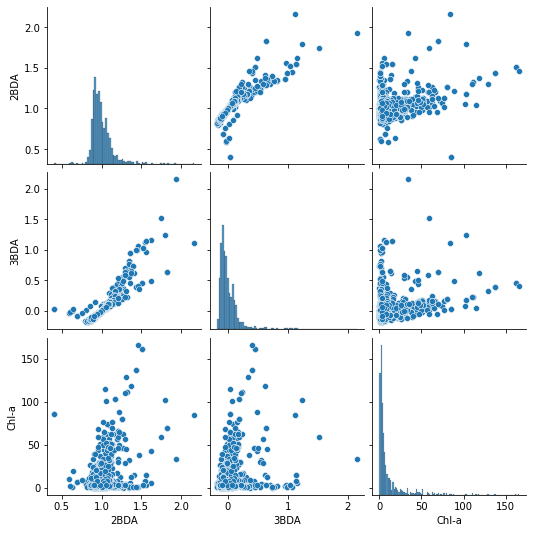

In [112]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData[list])

In [113]:
# Getting column names
X_columns = ["2BDA", "3BDA"]
Y = MergedData["Chl-a"]

In [114]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(MergedData[X_columns[0:2]].values, i) for i in range(MergedData[X_columns[0:2]].shape[1])]
vif["features"] = MergedData[X_columns[0:2]].columns

# display VIF
vif.round()

,VIF Factor,features
0,1.0,2BDA
1,1.0,3BDA


In [115]:
# Extract independent variables (X) & dependent variable (Y)
X = MergedData[X_columns]
Y = MergedData['Chl-a']

# Split X and Y into train and test 
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
#regression_model = OLS(Y_train,X_train)
#result = OLS(Y_train,X_train).fit()
#print(result.summary())

In [116]:
# Create a Linear Regression model with intercept
X=add_constant(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Chl-a   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     100.6
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.19e-40
Time:                        11:42:39   Log-Likelihood:                -4408.2
No. Observations:                1040   AIC:                             8822.
Df Residuals:                    1037   BIC:                             8837.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -77.3509      8.735     -8.855      0.0

In [117]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)


predicted Y: 91       5.279253
1102    -0.161924
1237     7.829180
683     11.206850
561      9.165949
          ...    
154     25.958076
639     15.913662
768      9.113887
821      5.426297
1006    20.058414
Length: 447, dtype: float64


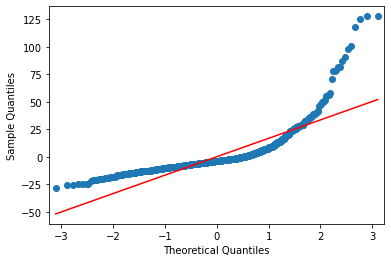

The mean of the residuals is -9.582e-16


In [118]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [119]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 2.48e+02
MAE 9.43
RMSE 15.8


In [120]:
# MergedData: Threshold  Chl-a < 2
MergedData1 = MergedData.loc[(MergedData["Chl-a"] > 2)]
MergedData1.shape

(1082, 24)

In [121]:
# get the summary
desc_mergeddata1 = MergedData1 [list].describe()

# add the standard deviation metric
desc_mergeddata1.loc['+3_std'] = desc_mergeddata1.loc['mean'] + (desc_mergeddata1.loc['std'] * 3)
desc_mergeddata1.loc['-3_std'] = desc_mergeddata1.loc['mean'] - (desc_mergeddata1.loc['std'] * 3)

# display it
desc_mergeddata1

,2BDA,3BDA,Chl-a
count,1082.000000,1082.000000,1082.000000
mean,1.003148,0.021406,14.006122
std,0.136958,0.188871,20.339084
min,0.406412,-0.181705,2.008000
25%,0.921132,-0.088717,3.400000
50%,0.975644,-0.026701,6.200000
75%,1.059886,0.075093,14.215500
max,2.165665,2.150818,166.300000
+3_std,1.414022,0.588020,75.023375
-3_std,0.592274,-0.545207,-47.011131


In [122]:
# Pearson Coefficient 
corr1 = MergedData1[list].corr(method='pearson')

# display the correlation matrix
display(corr1)

,2BDA,3BDA,Chl-a
2BDA,1.000000,0.901885,0.441742
3BDA,0.901885,1.000000,0.343008
Chl-a,0.441742,0.343008,1.000000


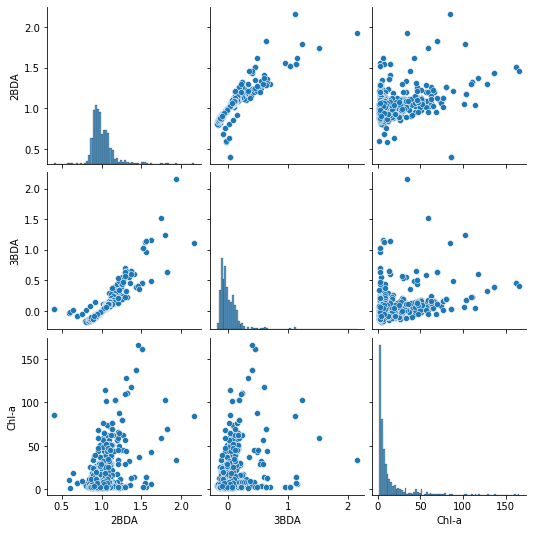

In [123]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData1[list])

In [124]:
# Extract independent variables (X) & dependent variable (Y)
X = MergedData1[X_columns]
Y = MergedData1['Chl-a']

# Split X and Y into train and test 
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
#regression_model = OLS(Y_train,X_train)
#result = OLS(Y_train,X_train).fit()
#print(result.summary())

In [125]:
# Create a Linear Regression model with intercept
X=add_constant(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Chl-a   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.90e-50
Time:                        11:43:03   Log-Likelihood:                -3262.7
No. Observations:                 757   AIC:                             6531.
Df Residuals:                     754   BIC:                             6545.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -119.9560     11.319    -10.598      0.0

In [126]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)

predicted Y: 1083     6.661714
956     24.021267
978      9.762109
1130    11.329064
220     12.926156
          ...    
180     12.024306
1226    14.876578
748     -4.924787
446     10.482837
372     21.274042
Length: 325, dtype: float64


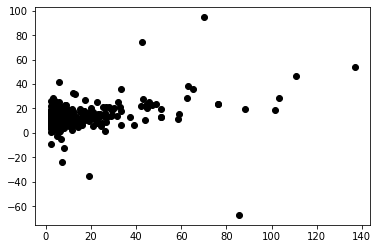

In [127]:
plt.plot(Y_test, Y_predict, 'o', color='black');

In [128]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 3.4e+02
MAE 11.5
RMSE 18.4


In [129]:
# MergedData: Threshold  Chl-a < 8
MergedData2 = MergedData.loc[(MergedData["Chl-a"] > 8)]
MergedData2.shape

(441, 24)

In [130]:
# get the summary
desc_mergeddata2 = MergedData2 [list].describe()

# add the standard deviation metric
desc_mergeddata2.loc['+3_std'] = desc_mergeddata2.loc['mean'] + (desc_mergeddata2.loc['std'] * 3)
desc_mergeddata2.loc['-3_std'] = desc_mergeddata2.loc['mean'] - (desc_mergeddata2.loc['std'] * 3)

# display it
desc_mergeddata2

,2BDA,3BDA,Chl-a
count,441.000000,441.000000,441.000000
mean,1.043218,0.067900,28.307474
std,0.164171,0.216030,25.814390
min,0.406412,-0.141255,8.068000
25%,0.953789,-0.046473,11.556000
50%,1.012558,0.019506,18.546000
75%,1.090054,0.113746,35.140000
max,2.165665,2.150818,166.300000
+3_std,1.535730,0.715991,105.750643
-3_std,0.550707,-0.580191,-49.135695


In [131]:
# Pearson Coefficient 
corr2 = MergedData2[list].corr(method='pearson')

# display the correlation matrix
display(corr2)

,2BDA,3BDA,Chl-a
2BDA,1.000000,0.866738,0.488378
3BDA,0.866738,1.000000,0.381051
Chl-a,0.488378,0.381051,1.000000


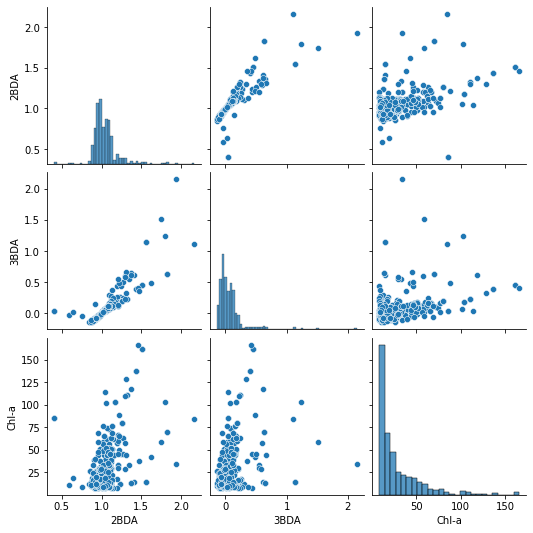

In [132]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData2[list])

In [133]:
# Extract independent variables (X) & dependent variable (Y)
X = MergedData2[X_columns]
Y = MergedData2['Chl-a']

# Split X and Y into train and test 
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
#regression_model = OLS(Y_train,X_train)
#result = OLS(Y_train,X_train).fit()
#print(result.summary())

In [134]:
# Create a Linear Regression model with intercept
X=add_constant(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Chl-a   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     40.66
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           2.23e-16
Time:                        11:43:17   Log-Likelihood:                -1402.3
No. Observations:                 308   AIC:                             2811.
Df Residuals:                     305   BIC:                             2822.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.6316     15.369     -2.774      0.0

In [135]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)

predicted Y: 837     22.438755
904     19.857930
647     19.675109
1474    32.589329
1190    24.024293
          ...    
151     31.393040
1195    24.017758
936     19.120678
338     29.971846
918     18.092118
Length: 133, dtype: float64


In [136]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 4.73e+02
MAE 14.8
RMSE 21.7
